In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [86]:
df = pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


[[ 1.   17.99]
 [ 1.   20.57]
 [ 1.   19.69]
 [ 1.   11.42]
 [ 1.   20.29]]
[[1]
 [1]
 [1]
 [1]
 [1]]


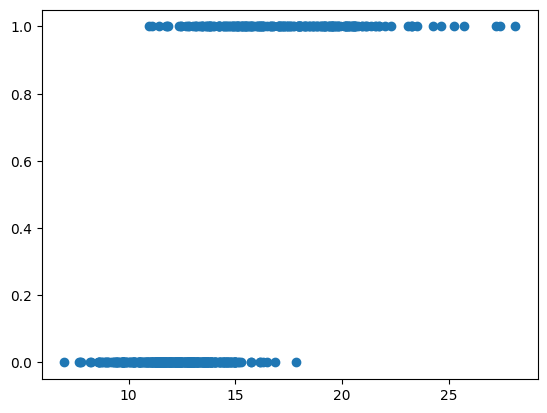

In [87]:
num_samples = df.shape[0]
num_features = 2
X1 = df['radius_mean'].to_numpy().reshape((num_samples,1))
X = np.hstack((np.ones((num_samples,1)), X1))
print(X[:5])
y = df['diagnosis'].replace(['M','B'],[1,0]).to_numpy().reshape((num_samples,1))
print(y[:5])
plt.scatter(X1,y)

[[0.99999999]
 [1.        ]
 [1.        ]
 [0.99999596]
 [1.        ]
 [0.99999856]
 [1.        ]
 [0.99999959]
 [0.99999917]
 [0.99999857]
 [0.99999996]
 [0.99999995]
 [1.        ]
 [0.99999995]
 [0.9999996 ]
 [0.99999982]
 [0.99999985]
 [0.99999996]
 [1.        ]
 [0.99999952]
 [0.99999923]
 [0.99997257]
 [0.99999992]
 [1.        ]
 [0.99999998]
 [0.99999999]
 [0.99999983]
 [1.        ]
 [0.99999992]
 [0.99999999]
 [1.        ]
 [0.99999735]
 [0.99999999]
 [1.        ]
 [0.99999996]
 [0.99999998]
 [0.99999976]
 [0.99999919]
 [0.99999989]
 [0.99999949]
 [0.99999946]
 [0.99999354]
 [1.        ]
 [0.99999937]
 [0.9999993 ]
 [1.        ]
 [0.99989857]
 [0.9999993 ]
 [0.99999785]
 [0.99999949]
 [0.99999713]
 [0.99999956]
 [0.9999976 ]
 [1.        ]
 [0.9999999 ]
 [0.99999635]
 [1.        ]
 [0.99999985]
 [0.99999921]
 [0.99993348]
 [0.99998591]
 [0.99993214]
 [0.99999976]
 [0.99996181]
 [0.99999885]
 [0.99999986]
 [0.99997148]
 [0.99999549]
 [0.9999559 ]
 [0.99999896]
 [1.        ]
 [0.99

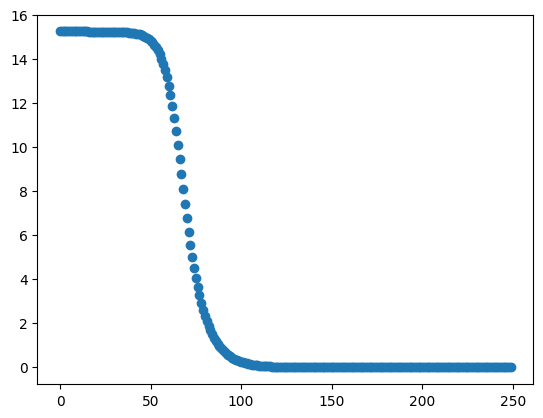

[[ 0.87538766]
 [-0.06926688]]


In [88]:
# gradient descent
n_iterations = 250
learning_rate = 0.001
gradients = []
iterations = []
params = np.ones((num_features,1))
# print(params)

def linear_predict(X,params):
    return X.dot(params)

def sigmoid(X):
    return 1/(1 + np.exp(-X))

def predict(X,params):
    return sigmoid(linear_predict(X,params))
    
def prob_to_binary(X):
    return np.vectorize(lambda x: 0 if (x>=0.5) else 1)(X)

for i in range(n_iterations):

    # IMP remember formula
    y_pred = predict(X,params) 
    print(y_pred)
    iter_grads = (2/num_samples) * X.T.dot(y_pred - y)
    params = params - learning_rate * iter_grads

    # for plotting
    iterations.append(i)
    gradients.append(iter_grads[1,0])

plt.scatter(iterations, gradients)
plt.show()
print(params)

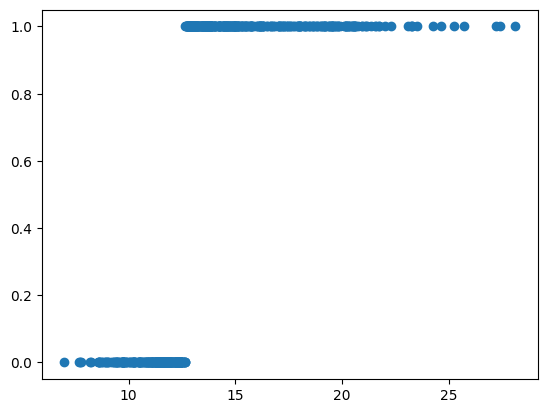

In [89]:
y_pred = prob_to_binary(predict(X,params))
plt.scatter(X1,y_pred)
plt.show()

In [90]:
from sklearn import metrics
cnf = metrics.confusion_matrix(y,y_pred)
print(cnf)
correct = cnf[0,0] + cnf[1,1]
wrong = cnf[0,1] + cnf[1,0]
print(correct)
print(wrong)
print("accuracy: ", (correct * 100)/(correct + wrong))

[[213 144]
 [  9 203]]
416
153
accuracy:  73.11072056239016
